In [18]:
import pandas as pd

# Load the dataset
file_path = "/content/WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(file_path)


In [19]:

# Display the first few rows and data types
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [21]:
# Drop columns with constant values or irrelevant to modeling
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], inplace=True)

# Convert 'Attrition' to binary
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

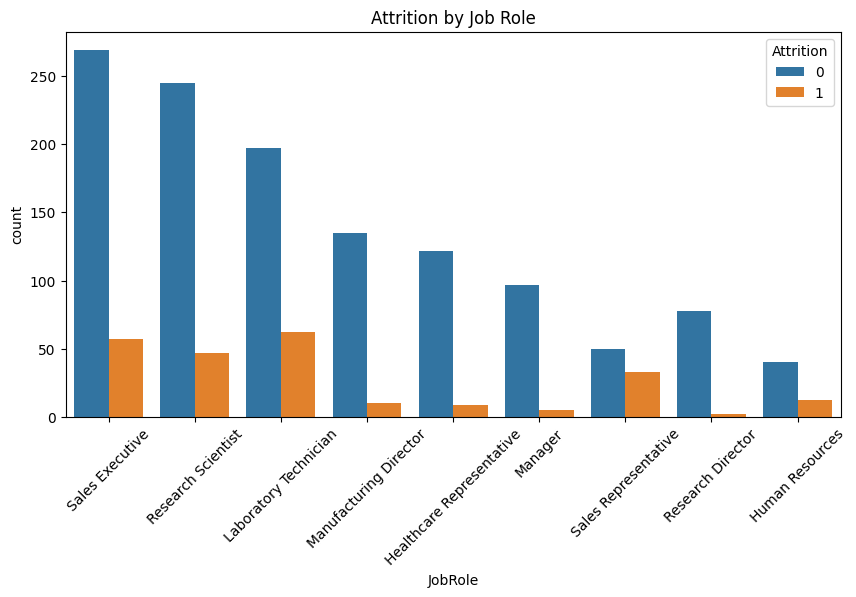

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Attrition by Job Role
plt.figure(figsize=(10, 5))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.title('Attrition by Job Role')
plt.show()

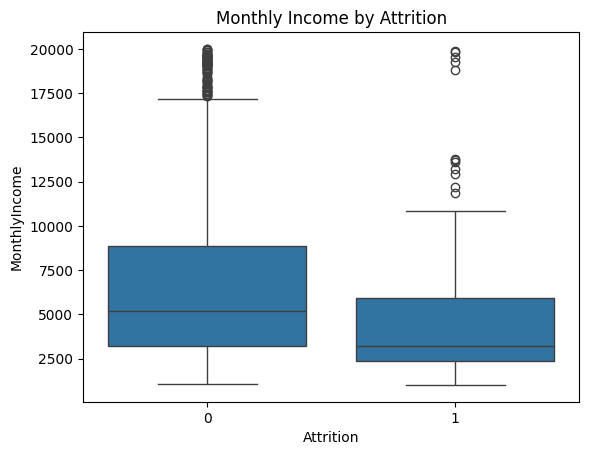

In [23]:

# Boxplot: Monthly Income vs Attrition
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income by Attrition')
plt.show()



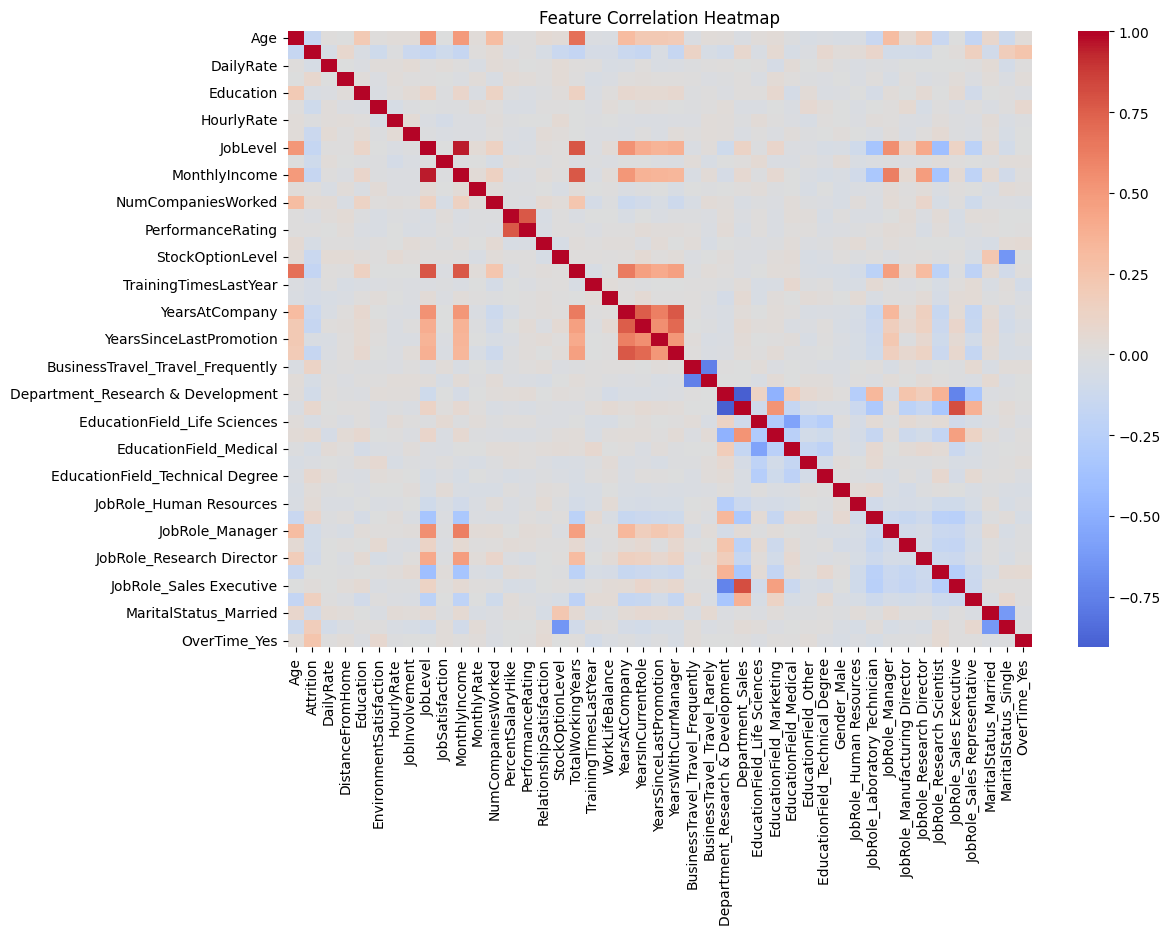

In [24]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

In [25]:
# Pearson correlation with Attrition
correlations = df_encoded.corr()['Attrition'].sort_values(ascending=False)
print(correlations.head(10))

Attrition                           1.000000
OverTime_Yes                        0.246118
MaritalStatus_Single                0.175419
JobRole_Sales Representative        0.157234
BusinessTravel_Travel_Frequently    0.115143
JobRole_Laboratory Technician       0.098290
Department_Sales                    0.080855
DistanceFromHome                    0.077924
EducationField_Technical Degree     0.069355
EducationField_Marketing            0.055781
Name: Attrition, dtype: float64


In [26]:
from scipy.stats import ttest_ind

left = df[df['Attrition'] == 1]['JobSatisfaction']
stayed = df[df['Attrition'] == 0]['JobSatisfaction']
t_stat, p_value = ttest_ind(left, stayed)
print("T-test p-value:", p_value)

T-test p-value: 7.04306674173115e-05


In [27]:
pd.crosstab(df['OverTime'], df['Attrition'], normalize='index')

Attrition,0,1
OverTime,,
No,0.895636,0.104364
Yes,0.694712,0.305288


Machine Learning

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Features and target
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.42      0.11      0.17        47

    accuracy                           0.83       294
   macro avg       0.63      0.54      0.54       294
weighted avg       0.78      0.83      0.79       294

[[240   7]
 [ 42   5]]


In [29]:
# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(10))

MonthlyIncome           0.072306
Age                     0.072260
TotalWorkingYears       0.053589
DailyRate               0.051670
HourlyRate              0.047866
DistanceFromHome        0.047793
MonthlyRate             0.047228
YearsAtCompany          0.044137
OverTime_Yes            0.037830
YearsWithCurrManager    0.035452
dtype: float64
